In [31]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

from sklearn.feature_extraction.text import HashingVectorizer

from wordcloud import WordCloud
import matplotlib.pyplot as plt


In [2]:
spam = pd.read_csv("spam.csv", encoding="latin-1")

In [3]:
spam.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
spam.shape

(5572, 5)

In [5]:
spam = spam[['v1', 'v2']]

# convert target to 0/1
spam['y'] = spam['v1'].map({'ham': 0, 'spam': 1})

# split to train and test sets
X_train, X_test, y_train, y_test = train_test_split(spam['v2'], spam['y'], test_size=0.2)

## Classification Algorithms

In [6]:
score = {}
prediction = {}

def train_predict(vec_train, y_train, vec_test, y_test):
    '''
    Trains classifiers and returns accuracy
    
    Inputs  
    
    vec_train: vectorized train data 
    y_train: train labels
    vec_test: vectorized train data 
    y_test: test labels 
    
    '''
    clf = MultinomialNB()
    clf.fit(vec_train.toarray(), y_train)
    prediction['Naive Bayes'] = clf.predict(vec_test.toarray())
    score['Naive Bayes'] = clf.score(vec_test.toarray(), y_test)
    
    lr = LogisticRegression()
    lr.fit(vec_train.toarray(), y_train)
    prediction['Logistic Regression'] = lr.predict(vec_test.toarray())
    score['Logistic Regression'] = lr.score(vec_test.toarray(), y_test)
    
    rf = RandomForestClassifier()
    rf.fit(vec_train.toarray(), y_train)
    prediction['Random Forest'] = rf.predict(vec_test.toarray())
    score['Random Forest'] = rf.score(vec_test.toarray(), y_test)
    
    xgb = XGBClassifier()
    xgb.fit(vec_train.toarray(), y_train)
    prediction['xgb'] = xgb.predict(vec_test.toarray())
    score['xgb'] = xgb.score(vec_test.toarray(), y_test)
    
    return score, prediction

## Vectorizers

### Count Vectorizer

In [7]:
obj = CountVectorizer()
obj.fit(X_train)

vec_train = obj.transform(X_train)
vec_test = obj.transform(X_test)

score_cvec, prediction_cvec = train_predict(vec_train, y_train, vec_test, y_test)
print(score_cvec)

{'Naive Bayes': 0.98744394618834086, 'Logistic Regression': 0.98385650224215249, 'Random Forest': 0.97309417040358748, 'xgb': 0.9695067264573991}


### Tf-Idf Vectorizer

In [8]:
obj = TfidfVectorizer()
obj.fit(X_train)

vec_train = obj.transform(X_train)
vec_test = obj.transform(X_test)

score_tfidf, prediction_tfidf = train_predict(vec_train, y_train, vec_test, y_test)
print(score_tfidf)

{'Naive Bayes': 0.95964125560538116, 'Logistic Regression': 0.97040358744394617, 'Random Forest': 0.97130044843049324, 'xgb': 0.97130044843049324}


### Hashing Vectorizer

In [9]:
obj = HashingVectorizer(n_features=6000, non_negative=True)
obj.fit(X_train)

vec_train = obj.transform(X_train)
vec_test = obj.transform(X_test)

score_hash, prediction_hash = train_predict(vec_train, y_train, vec_test, y_test)
print(score_hash)

C:\Anaconda3\lib\site-packages\sklearn\feature_extraction\hashing.py:94: DeprecationWarning: the option non_negative=True has been deprecated in 0.19 and will be removed in version 0.21.
  " in version 0.21.", DeprecationWarning)
C:\Anaconda3\lib\site-packages\sklearn\feature_extraction\hashing.py:94: DeprecationWarning: the option non_negative=True has been deprecated in 0.19 and will be removed in version 0.21.
  " in version 0.21.", DeprecationWarning)
C:\Anaconda3\lib\site-packages\sklearn\feature_extraction\hashing.py:94: DeprecationWarning: the option non_negative=True has been deprecated in 0.19 and will be removed in version 0.21.
  " in version 0.21.", DeprecationWarning)


{'Naive Bayes': 0.94529147982062778, 'Logistic Regression': 0.96771300448430497, 'Random Forest': 0.96771300448430497, 'xgb': 0.97040358744394617}


## Model Evaluation

In [24]:
print('Naive Bayes:\n', classification_report(y_test, prediction_cvec['Naive Bayes'], target_names = ["Ham", "Spam"]))

print('Logistic Regression:\n', classification_report(y_test, prediction_cvec['Logistic Regression'], target_names = ["Ham", "Spam"]))

Naive Bayes:
              precision    recall  f1-score   support

        Ham       0.94      1.00      0.97       976
       Spam       0.99      0.57      0.72       139

avg / total       0.95      0.95      0.94      1115

Logistic Regression:
              precision    recall  f1-score   support

        Ham       0.97      1.00      0.98       976
       Spam       0.98      0.76      0.85       139

avg / total       0.97      0.97      0.97      1115



## Visualization: Word Cloud

In [34]:
def visualize(label, df):
    words = ''
    for w in df.loc[df['v1']==label, 'v2']:
        words += w.lower() + ' '
    wordcloud=WordCloud(width=1800, height=1600).generate(words)
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

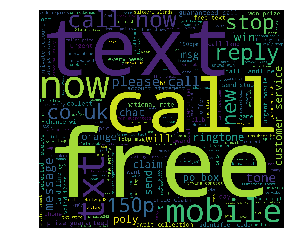

In [35]:
visualize('spam',spam)

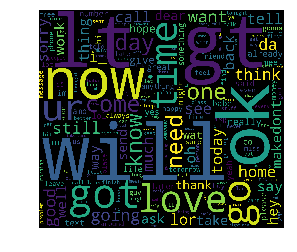

In [36]:
visualize('ham',spam)

### <span style="color:red"> To be added: Identify Spam Using Deep Learning </span>